In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:verdana;"> <center> Brain Tumor Classification ; ResNet 50 Transfer Learning</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:30px">“You don’t understand anything until you learn it more than one way.” – Marvin Minsky</center></p>

![brain](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Brain%20Tumor%20Classification%2C%20Transfer%20Learning/robina-weermeijer-3KGF9R_0oHs-unsplash.jpg)

<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  About Brain Tumor </h4>


<span style="font-family:cursive; font-size:15px;">A brain tumor is an abnormal growth of tissue in the brain or central spine that can disrupt proper brain function. Doctors refer to a tumor based on where the tumor cells originated, and whether they are cancerous (malignant) or not (benign) </span>

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Please vote it up if you like it . 🙏 & Share it with your fellow kagglers.
</div>

 # #Table of Contents
 
 
<span style="font-family:cursive; font-size:15px;">1 Introduction </span>


<span style="font-family:cursive; font-size:15px;">2 Importing Libraries </span>


<span style="font-family:cursive; font-size:15px;">2.2 Importing Data </span>


<span style="font-family:cursive; font-size:15px;">
3 Data Distribution of whole Data </span>


<span style="font-family:cursive; font-size:15px;">4 Siplting the Data into Train test and Val
 </span>


<span style="font-family:cursive; font-size:15px;">4.1 Distributation of Train Data </span>


<span style="font-family:cursive; font-size:15px;">4.2 Distributation of val Data </span>


<span style="font-family:cursive; font-size:15px;">5 Displaying Images  </span>


<span style="font-family:cursive; font-size:15px;">6 Transfer Learning </span>


<span style="font-family:cursive; font-size:15px;"> 7Call Backs </span>


<span style="font-family:cursive; font-size:15px;"> 8Plottting the Result</span>


<span style="font-family:cursive; font-size:15px;"> 9 Model Evaluation </span>


<span style="font-family:cursive; font-size:15px;"> 10 Predition Comparsion </span>


<span style="font-family:cursive; font-size:15px;">11 Confusion Matrix </span>




<h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Introduction  </h1>
           

<span style="font-family:cursive; font-size:30px;">In this notebook, we will learn how to classify images of brain tumor by using transfer learning from a pre-trained network. </span>


<span style="font-family:cursive; font-size:15px;"> 
What we will learn:</span>


<span style="font-family:cursive; font-size:15px;"> Load the images. </span>


<span style="font-family:cursive; font-size:15px;"> 

Visulaise the Data distribution of all data. </span>


<span style="font-family:cursive; font-size:15px;"> 
Visualizing some of the images </span>


<span style="font-family:cursive; font-size:15px;">Setting up callbacks </span>


<span style="font-family:cursive; font-size:15px;">Transfer learning </span>


<span style="font-family:cursive; font-size:15px;">ResNet </span>


<span style="font-family:cursive; font-size:15px;">
Graph the training loss and validation loss </span>


<span style="font-family:cursive; font-size:15px;">Predict the results</span>
           



<h5   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Installing some Libraries </h5>

In [1]:
!pip install split-folders

<h1  id="2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2 Importing Libraries </h1>
           
   

<span style="font-family:cursive; font-size:25px;">We are Importing Libraries. </span>


<span style="font-family:cursive; font-size:15px;">
Libraries which need for. </span>


<span style="font-family:cursive; font-size:15px;">Image Processing. </span>


<span style="font-family:cursive; font-size:15px;">


Data visualization. </span>


<span style="font-family:cursive; font-size:15px;">Model Loading..</span>







In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import itertools
import plotly.graph_objects as go
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

    

<h1  id="2.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2.1 Setting path </h1>


In [5]:
data_dir = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"
data_dir =pathlib.Path(data_dir)

In [6]:

Total_Images1 = glob.glob('../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/*/*.JPG')
#print("Total number of images: ", len(Total_Images1))

Total_Images2 = glob.glob('../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/*/*.jpg')

#print("Total number of images: ", len(Total_Images2))

Total_Images = Total_Images1 + Total_Images2
print("Total number of images: ", len(Total_Images))

Total_Images = pd.Series(Total_Images)

Total number of images:  245



<h5 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Setting Data Frame</h5>

In [7]:
total_df = pd.DataFrame()

# generate Filename field
total_df['Filename'] = Total_Images.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
total_df['ClassId'] = Total_Images.map(lambda img_name: img_name.split("/")[-2])

total_df.head()

Filename ClassId
0  N20.JPG      no
1   N1.JPG      no
2  N26.JPG      no
3  N22.JPG      no
4  N19.JPG      no

In [8]:
class_id_distributionTotal = total_df['ClassId'].value_counts()
class_id_distributionTotal.head(10)

yes    154
no      91
Name: ClassId, dtype: int64

<h1  id="3" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Data Distribution of All Data</h1>
 

<span style="font-family:cursive; font-size:30px;">
Below chart shows the perentage of data of two different classes. </span>

<span style="font-family:cursive; font-size:15px;"> "Yes" class contains 62.9% from data.
. </span>

<span style="font-family:cursive; font-size:15px;">"No" class contains 37.1% from data.. </span>

<span style="font-family:cursive; font-size:15px;">Clearly the data is not equaly distributed. </span>



In [9]:
fig = go.Figure(go.Bar(
            x=  class_id_distributionTotal.values,
            y=class_id_distributionTotal.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [10]:
fig=px.pie(class_id_distributionTotal.head(10),values= 'ClassId', names=total_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<h1  id="4" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4 Siplitting data into Train, Test, Val data set </h1>




      
<span style="font-family:cursive; font-size:30px;">using split folder so we can divide the data in to three parts.. </span>

<span style="font-family:cursive; font-size:15px;"> Training Set contain 80% of data. </span>

<span style="font-family:cursive; font-size:15px;">Test Set contain 10% of data. </span>

<span style="font-family:cursive; font-size:15px;"> Validation Set contain 10% of data</span>



In [11]:

splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 253 files [00:02, 110.98 files/s]


<span style="font-family:cursive; font-size:35px;">Setting Path for Train , Test, val. </span>

In [12]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)



<span style="font-family:cursive; font-size:35px;">Counting the number of Images in each sub folder </span>



In [13]:
import glob
train_image1 = glob.glob('./output/train/*/*.jpg')
train_image2 = glob.glob('./output/train/*/*.JPG')
Total_TrainImages = train_image1 + train_image2
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpg')
test_image2 = glob.glob('./output/test/*/*.JPG')
Total_TestImages = test_image1 + test_image2
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpg')
Val_image2 = glob.glob('./output/val/*/*.JPG')
Total_ValImages = Val_image1 + Val_image2
print("Total number of val images: ", len(Total_ValImages))









Total number of training images:  194
Total number of test images:  27
Total number of val images:  24


<span style="font-family:cursive; font-size:35px;">Below Pie Charts Shows. </span>

<span style="font-family:cursive; font-size:15px;">"Trainng Set"  contains 79.2% from data. </span>

<span style="font-family:cursive; font-size:15px;">"Test Set"  contains 11% from data.. </span>

<span style="font-family:cursive; font-size:15px;"> "Val Set"  contains 9% from data. </span>
 

In [14]:
random_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Pistachio',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<span style="font-family:cursive; font-size:35px;"> Making the data frame for Train Data </span>




In [15]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

Filename ClassId
0   no 3.jpg      no
1  10 no.jpg      no
2  30 no.jpg      no
3   No11.jpg      no
4  18 no.jpg      no

In [17]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

yes    123
no      71
Name: ClassId, dtype: int64




 Visulaize in form of bar

<h1  id="4.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4.1 Data Distribution of Train Data </h1>
           
  
      


<span style="font-family:cursive; font-size:15px;">Below chart shows the perentage of data  of two different classes in training data set. </span>

<span style="font-family:cursive; font-size:15px;">
 "Yes" class contains 63.4% from data. </span>

<span style="font-family:cursive; font-size:15px;">

 "No" class contains 36.6% from data. </span>




 



In [18]:
fig = go.Figure(go.Bar(
            x= class_id_distribution_Train.values,
            y=class_id_distribution_Train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [19]:
fig=px.pie(class_id_distribution_Train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Brain Tumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()



<span style="font-family:cursive; font-size:35px;">Making Data  Frame of Test Data </span>

In [20]:
test_image_names = pd.Series(Total_TestImages)
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: img_name.split("/")[-2])

test_df.head()

Filename ClassId
0  15 no.jpg      no
1  35 no.jpg      no
2   No17.jpg      no
3   No12.jpg      no
4   no 8.jpg      no

In [21]:
class_id_distribution_test = test_df['ClassId'].value_counts()
class_id_distribution_test.head(10)

yes    16
no     11
Name: ClassId, dtype: int64

<h1  id="4.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 4.1 Data Distribution of Test Data </h1>



<span style="font-family:cursive; font-size:15px;">Below chart shows the perentage of data of two different classes. </span>

<span style="font-family:cursive; font-size:15px;">"Yes" class contains 59.3% from data. </span>

<span style="font-family:cursive; font-size:15px;">"No" class contains 40.7% from data. </span>

 

In [22]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_test.values,
            y=class_id_distribution_test.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Test Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [23]:
fig=px.pie(class_id_distribution_test.head(10),values= 'ClassId', names=test_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Validation Data',font_size=15,title_x=0.45,annotations=[dict(text='Brain Tumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<a id="7"> </a> 

  <h1 style="color:white; background:slateblue;">   Displaying The Images  </h1>  
      

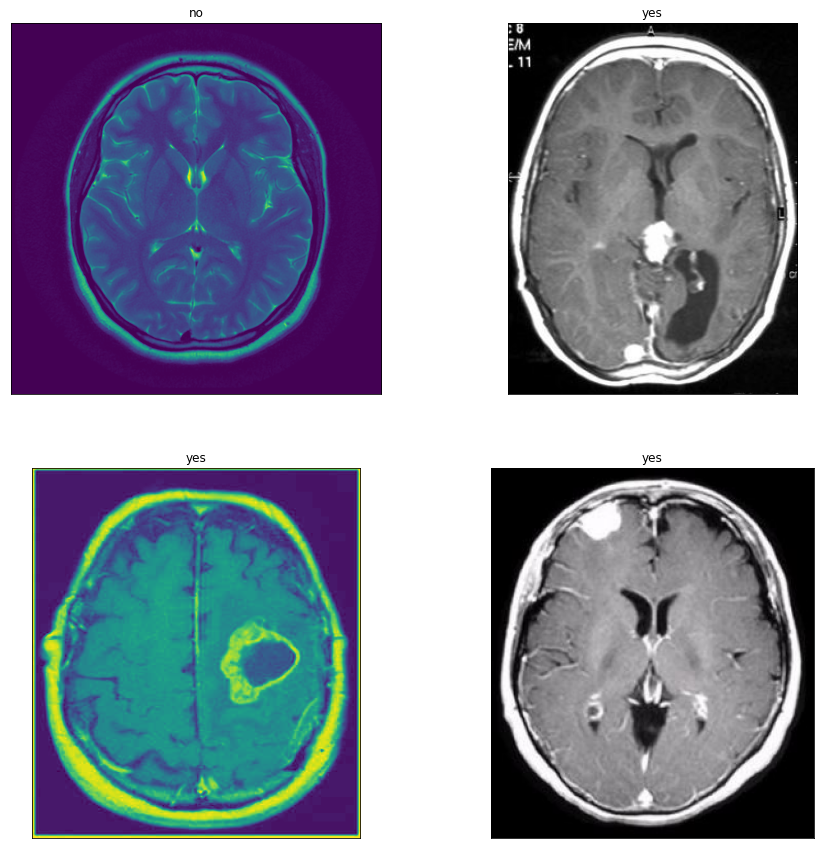

In [24]:
plot_df = train_df.sample(6).reset_index()
plt.figure(figsize=(15, 15))

for i in range(4):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])


<h1  id="6" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Image Data Generator </h1>



<span style="font-family:cursive; font-size:15px;">It is use for the Pre processing of data. </span>


<span style="font-family:cursive; font-size:15px;">Flow from directory : </span>


<span style="font-family:cursive; font-size:15px;">Takes the path to a directory & generates batches of augmented data. : </span>





In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 202 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 24 images belonging to 2 classes.



<h1  id="2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Transfer Learning </h1>
           
    

<span style="font-family:cursive; font-size:35px;">Transfer Learning </span>

<span style="font-family:cursive; font-size:15px;">A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task such as Image Net Data set. The weights of the pre trained model can be ustilse for the classification of other task. You don't have to train your model from scratch. </span>

<span style="font-family:cursive; font-size:15px;">

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model and can be use for other different task of classification. The feature map of Pre Trained Model can be  used. </span>

************



In [26]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94781440/94765736 [==============================] - 0s 0us/step


<span style="font-family:cursive; font-size:15px;">Making layer Train able to False so it will not learn from Scratch. </span>

In [27]:
for layers in model.layers:
    layers.trainable = False

****


<span style="font-family:cursive; font-size:15px;">You can see the number of trainable parameters reduced to a large extent.. </span>



In [28]:
from keras.layers import  Dropout
x = Flatten()(model.output)
x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________


<span style="font-family:cursive; font-size:15px;">
Visual Respresntation of Model.. </span>



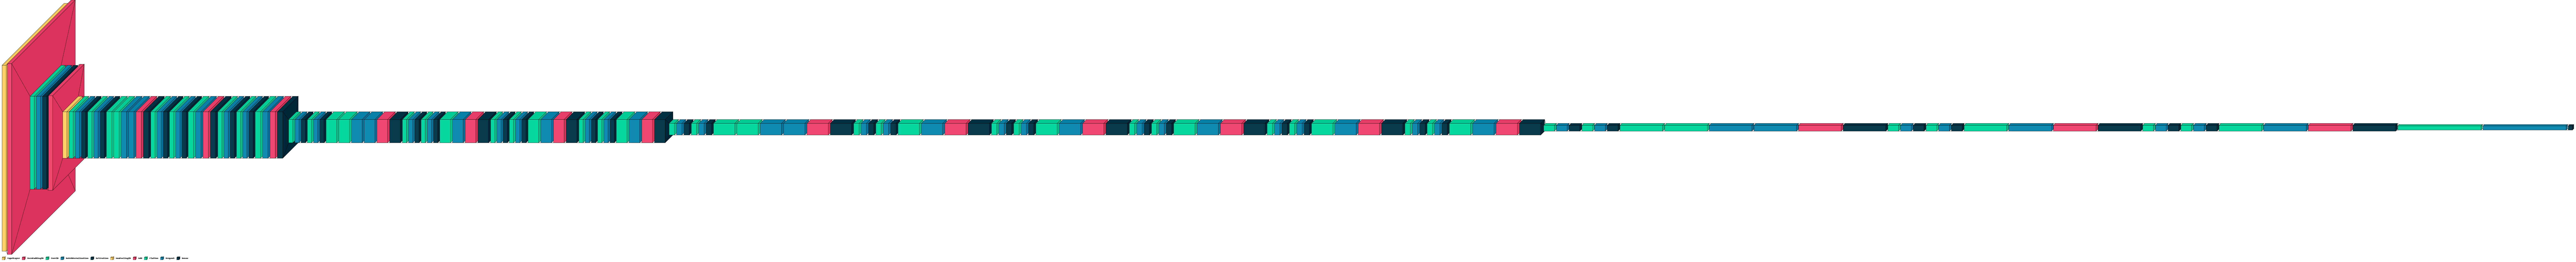

In [30]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

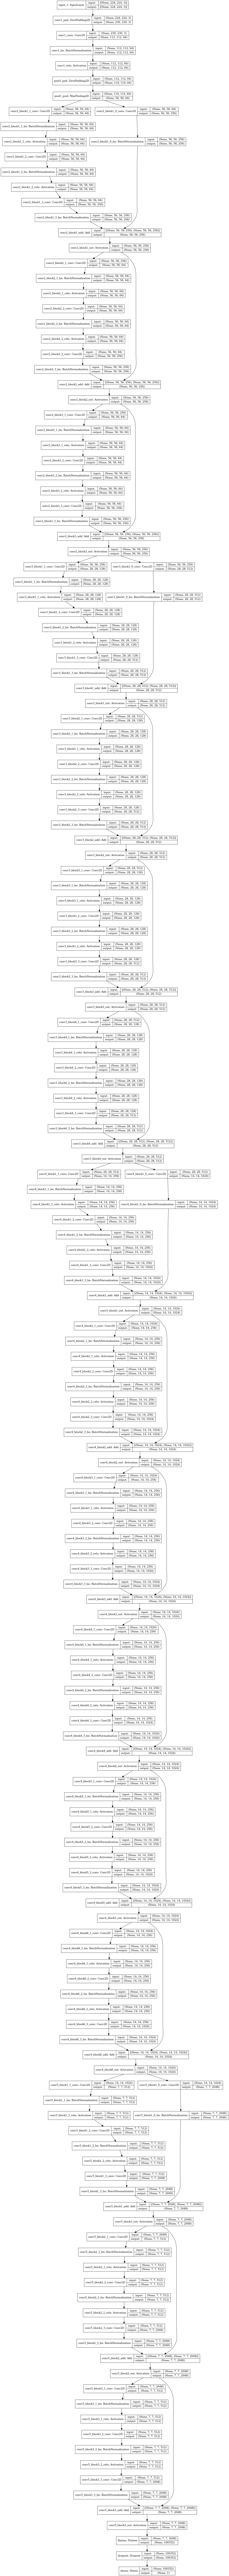

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 


<h1  id="7" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 7 Tensor Flow Call Back</h1>



<span style="font-family:cursive; font-size:15px;">A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).. </span>





In [37]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [38]:
mc = ModelCheckpoint('./output/model.h5', monitor='val_accuracy', mode='max' )




<span style="font-family:cursive; font-size:35px;">Train The Model. </span>


In [39]:
H = model.fit_generator(train_generator,validation_data=val_generator,epochs=150,verbose=1, callbacks=[mc,es])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/150
7/7 [==============================] - 13s 598ms/step - loss: 3.4544 - accuracy: 0.5693 - val_loss: 5.5833 - val_accuracy: 0.6667


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/150
7/7 [==============================] - 3s 384ms/step - loss: 2.0279 - accuracy: 0.7673 - val_loss: 1.0721 - val_accuracy: 0.8750
Epoch 3/150
7/7 [==============================] - 3s 418ms/step - loss: 1.5125 - accuracy: 0.8663 - val_loss: 2.1309 - val_accuracy: 0.8333
Epoch 4/150
7/7 [==============================] - 3s 373ms/step - loss: 1.2700 - accuracy: 0.8564 - val_loss: 0.9464 - val_accuracy: 0.8750
Epoch 5/150
7/7 [==============================] - 3s 364ms/step - loss: 1.0550 - accuracy: 0.9059 - val_loss: 1.6566 - val_accuracy: 0.9167
Epoch 6/150
7/7 [==============================] - 3s 419ms/step - loss: 0.4236 - accuracy: 0.9257 - val_loss: 0.8567 - val_accuracy: 0.9167
Epoch 7/150
7/7 [==============================] - 3s 376ms/step - loss: 0.5837 - accuracy: 0.9010 - val_loss: 1.4479 - val_accuracy: 0.9167
Epoch 8/150
7/7 [==============================] - 3s 367ms/step - loss: 0.5756 - accuracy: 0.8911 - val_loss: 1.2526 - val_accuracy: 0.7500
Epoch 9/150
7

In [40]:
hist = H.history

<h1  id="8" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 8 Plotting the History </h1>
      




Text(0, 0.5, 'accuracy')

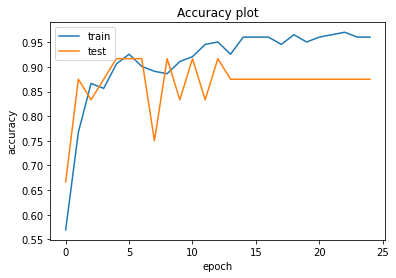

In [41]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

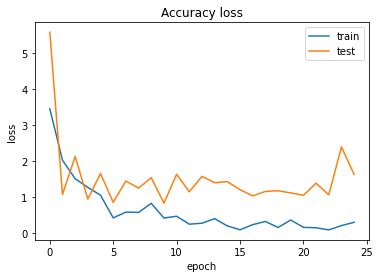

In [42]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")


   
<h1  id="9" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 9 Model Evaluation </h1>
      

In [43]:
 test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

1/1 [==============================] - 0s 350ms/step - loss: 3.2034 - accuracy: 0.7778
Loss: 320.337
Accuracy: 77.778


<h1  id="9.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 10.1 Classifiaction Report </h1>
      

In [44]:
from sklearn.metrics import classification_report

In [45]:
y_val = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [46]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        11
           1       0.00      0.00      0.00        16

    accuracy                           0.41        27
   macro avg       0.20      0.50      0.29        27
weighted avg       0.17      0.41      0.24        27



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [47]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [48]:
filenames = test_generator.filenames

In [49]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual predicted  Same
0   no/15 no.jpg     no        no  True
1   no/32 no.jpg     no        no  True
2   no/35 no.jpg     no        no  True
3   no/36 no.jpg     no        no  True
4    no/6 no.jpg     no        no  True
5     no/N26.JPG     no        no  True
6    no/No12.jpg     no        no  True
7    no/No17.jpg     no        no  True
8    no/No22.jpg     no        no  True
9  no/no 100.jpg     no        no  True

In [50]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

<h1  id="11" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 11 Prediction Comparison </h1>

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(6):
        n+=1
        plt.subplot(3 , 3, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

<h1  style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Correctly Classified </h1>

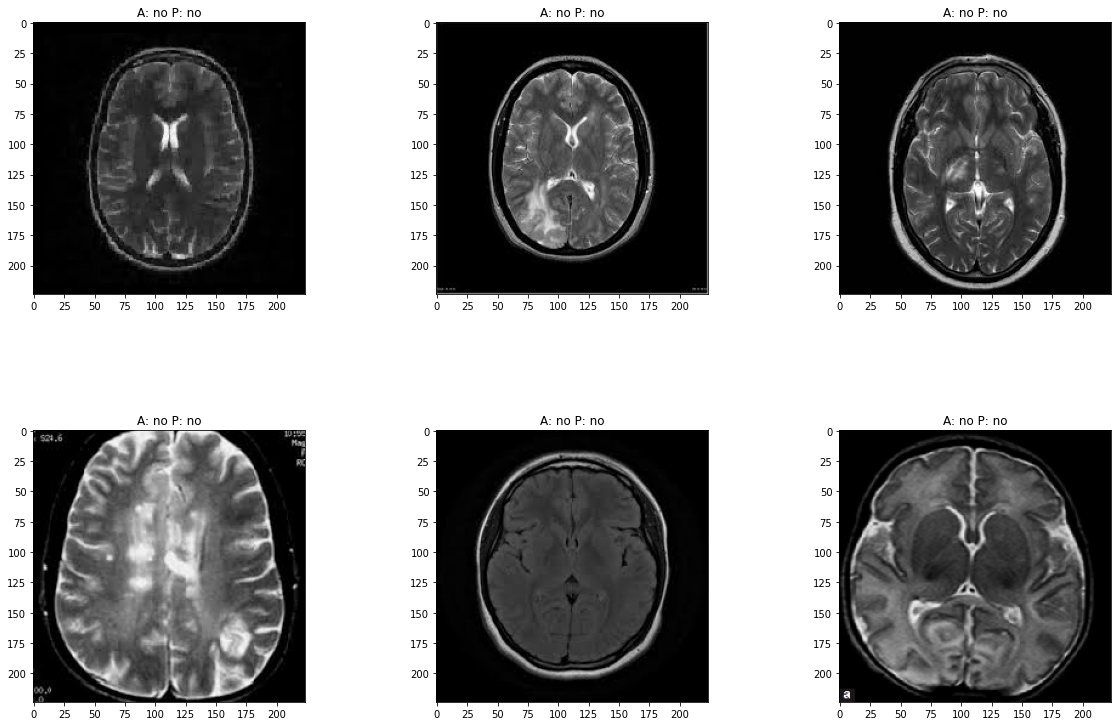

In [56]:
display_images(val_df[val_df['Same']==True])

<h1  style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Miss Classified </h1>

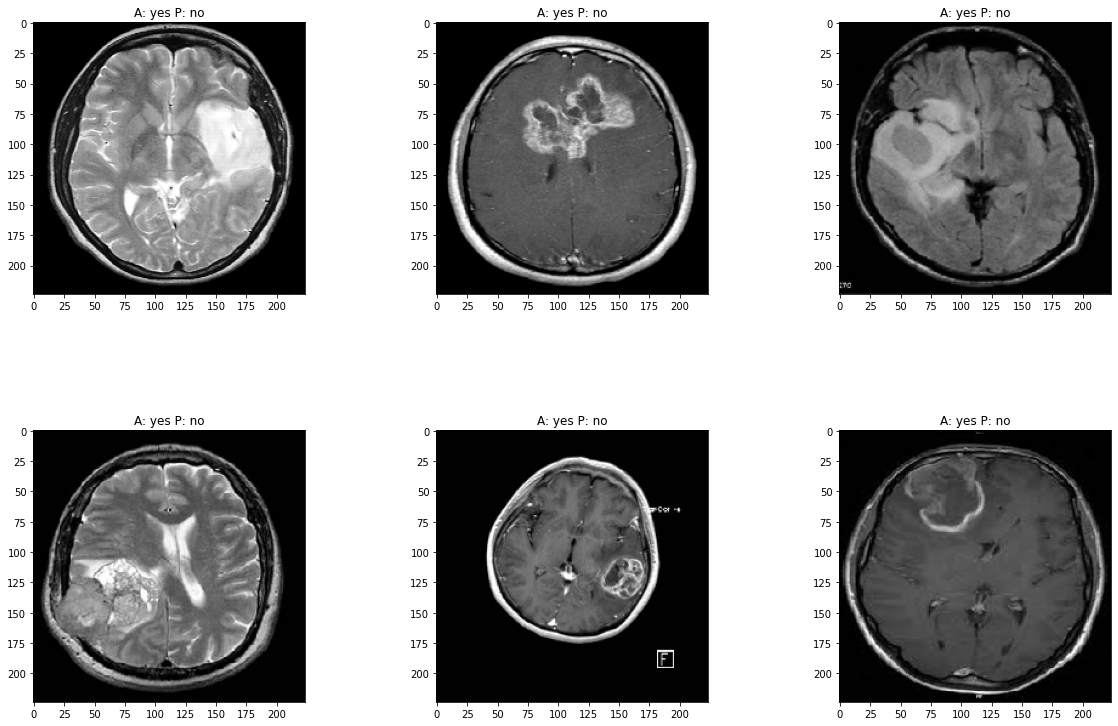

In [57]:
display_images(val_df[val_df['Same']!=True])

<a id="12"> </a> 
<h1 style="color:white; background:slateblue;">       Confusion Matrix </h1>


In [58]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [59]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[11  0]
 [16  0]]


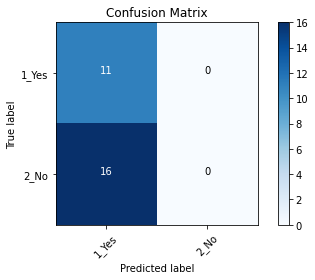

In [60]:
cm_plot_labels = ['1_Yes', '2_No']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')